In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import time
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Part I: Data Preparation
1. Load the MNIST dataset.
2. Normalize the images so that pixel values are between 0 and 1.
3. Split the dataset into training (80%) and testing (20%) sets.

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()


# Concatenate x_train and x_test arrays
X = np.concatenate((x_train, x_test), axis=0)

# Concatenate y_train and y_test arrays
y = np.concatenate((y_train, y_test), axis=0)

print("Shape of X:", X.shape)
print("Shape of y", y.shape)

Shape of X: (70000, 28, 28)
Shape of y (70000,)


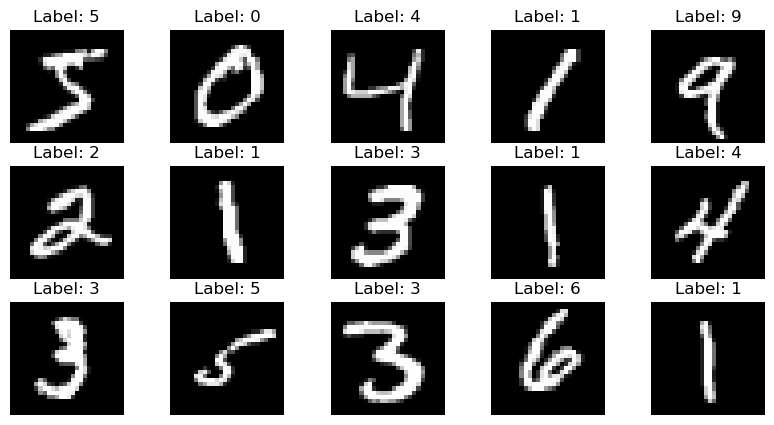

In [3]:
# Displaying first few images

plt.figure(figsize=(10, 5))
for i in range(15):
    plt.subplot(3,5,i + 1)
    plt.imshow(X[i], cmap='gray')
    plt.title(f'Label: {y[i]}')
    plt.axis('off')
plt.show()

In [4]:
# Flatten the input data
X = X.reshape((X.shape[0], -1))
print("Shape of data after flattening input",X.shape)

Shape of data after flattening input (70000, 784)


In [5]:
# Normalize the images so that pixel values are between 0 and 1
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [6]:
# Split the dataset into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

print("Training set X shape:", X_train.shape)
print("Training set y shape:", y_train.shape)
print("Testing set X shape:", X_test.shape)
print("Testing set y shape:", y_test.shape)

Training set X shape: (56000, 784)
Training set y shape: (56000,)
Testing set X shape: (14000, 784)
Testing set y shape: (14000,)


# Part II: Implement PCA
1. Apply PCA to reduce the dimensions of the dataset. Initially, choose 50 components for 
dimensionality reduction.
2. Explore the variance explained by the selected number of components and adjust if necessary to 
retain at least 95% of the variance.
3. Show the Scree plot.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

n_components = 50
# Apply PCA
pca1 = PCA(n_components=n_components)  # Choose 50 components initially
X_train_pca1 = pca1.fit_transform(X_train)
X_test_pca1 = pca1.transform(X_test)

# Check the shape of the transformed datasets
print("Shape of X_train after PCA:", X_train_pca1.shape)
print("Shape of X_test after PCA:", X_test_pca1.shape)


Shape of X_train after PCA: (56000, 50)
Shape of X_test after PCA: (14000, 50)


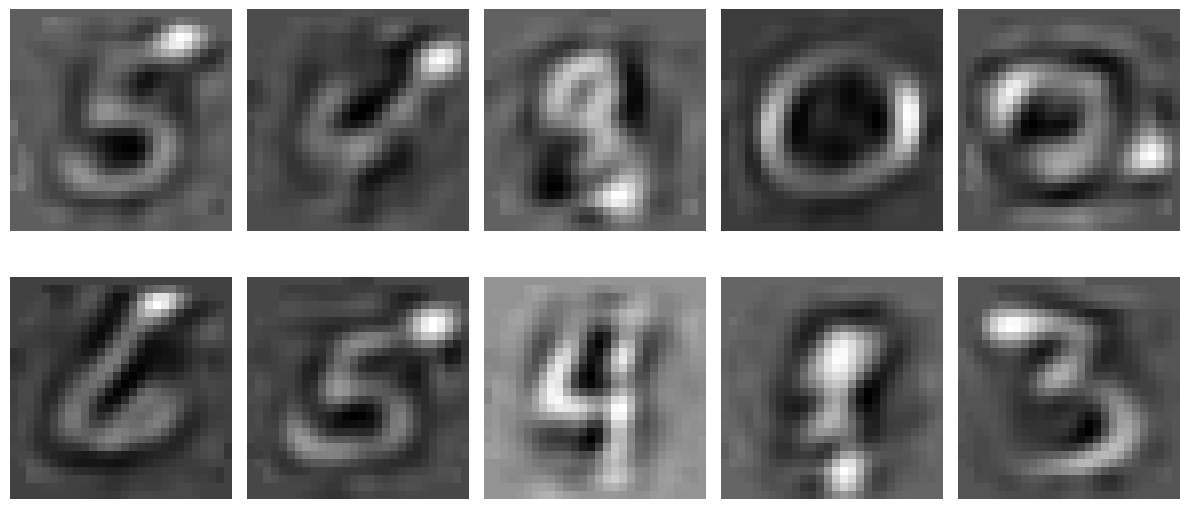

In [8]:
# Displaying images after applying pca

plt.figure(figsize=(12, 6))
for i in range(10):
    # Inverse transform the transformed image back to its original space
    reconstructed_image = pca1.inverse_transform(X_train_pca1[i]).reshape(28, 28)
    # Plot the reconstructed image
    plt.subplot(2, 5, i + 1)
    plt.imshow(reconstructed_image, cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

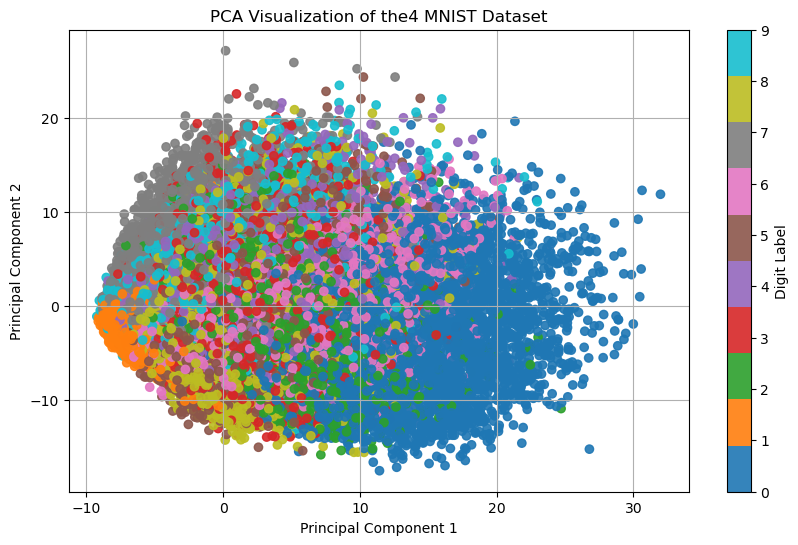

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca1[:, 0], X_train_pca1[:, 1], c=y_train, cmap='tab10', alpha=0.9)
plt.colorbar(label='Digit Label')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of the4 MNIST Dataset')
plt.grid(True)
plt.show()


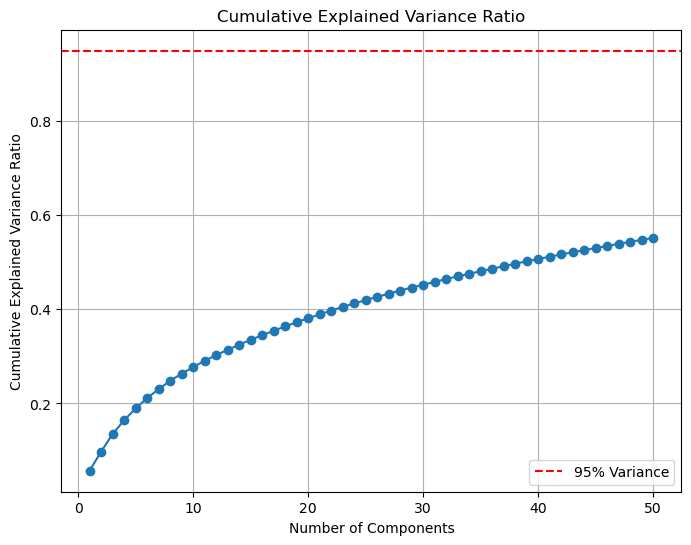

In [10]:
# Compute the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca1.explained_variance_ratio_)

# Plot cumulative explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, n_components + 1), cumulative_variance_ratio, marker='o', linestyle='-')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
# Apply PCA
pca2 = PCA(0.95)  # Choose at to retain atleast 95 percent as variance 
X_train_pca2 = pca2.fit_transform(X_train)
X_test_pca2 = pca2.transform(X_test)

# Check the shape of the transformed datasets
print("Shape of X_train after PCA:", X_train_pca2.shape)
print("Shape of X_test after PCA:", X_test_pca2.shape)

Shape of X_train after PCA: (56000, 327)
Shape of X_test after PCA: (14000, 327)


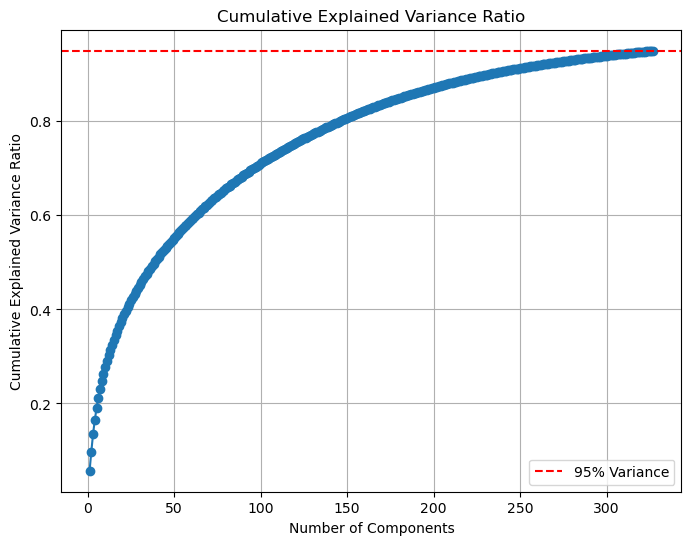

In [12]:
# Compute the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca2.explained_variance_ratio_)

n_component = pca2.n_components_
# Plot cumulative explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, n_component + 1), cumulative_variance_ratio, marker='o', linestyle='-')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.legend()
plt.grid(True)
plt.show()

# Part III: Classification with Logistic Regression
1. Implement a Logistic Regression classifier.
2. Train the classifier on the original high-dimensional data and evaluate its performance on the 
test set.
3. Train the classifier on the PCA-reduced training data and validate its performance using the PCAreduced test data

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

training_time =[]

# Create a Logistic Regression classifier
classifier1 = LogisticRegression()

# Start time
stat1 = time.time()

# Train the classifier on the original high-dimensional data
classifier1.fit(X_train, y_train)

# End time
end1 = time.time()

# Training time for classifier 1
training_time1 = end1 - stat1

# Adding the training to list 
training_time.append(training_time1)

print("Training time for the Logistic Regression classifier on the original data is",training_time1)

Training time for the Logistic Regression classifier on the original data is 10.234287738800049


Warning encontered while running the Logistic regression on the mnist dataset , this is due to the limitation of iterations in the in built library of Logistic regression model

Note: Supressed the warning below by ignoring it using the import warining in the first cell

D:\Anaconda\envs\TensorflowEnv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
# Evaluate the classifier's performance on the test set
y_pred = classifier1.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for the Logistic Regression classifier on the original data is :", accuracy*100)

# Generate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix of classifier 1:")
print(conf_mat)

# Generate classification report
print("Classification Report of classfier 1:")
print(classification_report(y_test, y_pred))



Accuracy for the Logistic Regression classifier on the original data is : 91.62142857142858
Confusion Matrix of classifier 1:
[[1284    1   10    0    1   13   22    4    6    2]
 [   0 1551    7    9    3    7    0    4   16    3]
 [   6   17 1237   21   12   12   22   15   28   10]
 [   4   11   38 1270    1   42    7   22   20   18]
 [   5    3    8    4 1193    5   12    9    9   47]
 [  10   10    9   40   12 1117   19    3   37   16]
 [   5    4   21    1   17   19 1320    3    6    0]
 [   5    5   23    6   13    6    0 1412    1   32]
 [  11   31   16   44    6   44   13    9 1163   20]
 [   7   10    5   13   37    5    0   48   15 1280]]
Classification Report of classfier 1:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1343
           1       0.94      0.97      0.96      1600
           2       0.90      0.90      0.90      1380
           3       0.90      0.89      0.89      1433
           4       0.92      0.92 

In [15]:

# Create a Logistic Regression classifier
classifier2 = LogisticRegression()

# Start time
stat2 = time.time()

#Train a Logistic Regression classifier on the PCA-transformed training data with n_components = 50
classifier2.fit(X_train_pca1, y_train)

# End time
end2 = time.time()

# Training time for classifier 1
training_time2 = end2 - stat2

# Adding the training to list 
training_time.append(training_time2)

print("Training time for the Logistic Regression classifier on the PCA-trasformed training  data with n_components=50 is",training_time2)



Training time for the Logistic Regression classifier on the PCA-trasformed training  data with n_components=50 is 2.3927159309387207


In [16]:
# Evaluate the classifier's performance on the PCA-transformed test set with n_components = 50
y_pred = classifier2.predict(X_test_pca1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Logistic Regression classifier on the PCA-trasformed training  data with n_components=50 is:", accuracy*100)

# Generate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix of classifier 2:")
print(conf_mat)

# Generate classification report
print("Classification Report of classfier 2:")
print(classification_report(y_test, y_pred))

Accuracy of the Logistic Regression classifier on the PCA-trasformed training  data with n_components=50 is: 90.52142857142857
Confusion Matrix of classifier 2:
[[1284    0    8    2    2   14   12    7   13    1]
 [   0 1551    3   12    1   10    1    4   16    2]
 [   4   18 1221   23   15   11   25   16   40    7]
 [   8   10   31 1253    2   55    5   20   31   18]
 [   5    3    9    3 1188    5   15    6    7   54]
 [   8    7   11   59   22 1081   17    6   51   11]
 [   4    3   20    0   12   19 1326    3    9    0]
 [   6   10   27    8   10    5    0 1384    1   52]
 [  11   31   17   64    8   55    9    9 1136   17]
 [  12   13    7   16   47    9    0   55   12 1249]]
Classification Report of classfier 2:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1343
           1       0.94      0.97      0.96      1600
           2       0.90      0.88      0.89      1380
           3       0.87      0.87      0.87      1433

In [17]:
# Create a Logistic Regression classifier
classifier3 = LogisticRegression()

stat3 = time.time()

# Train the classifier on the reduced data 
classifier3.fit(X_train_pca2, y_train)

# End time
end3 = time.time()

# Training time for classifier 1
training_time3 = end3 - stat3

# Adding the training to list 
training_time.append(training_time3)


print("Training time for the Logistic Regression classifier on the PCA-trasformed training  data which retain 95 percent of variance is",training_time2)



Training time for the Logistic Regression classifier on the PCA-trasformed training  data which retain 95 percent of variance is 2.3927159309387207


In [18]:
# Evaluate the classifier's performance on the test set
y_pred = classifier3.predict(X_test_pca2)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression model on PCA-transformed training data which retain 95 percent of variance", accuracy*100)

# Generate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix of classifier 3:")
print(conf_mat)

# Generate classification report
print("Classification Report of classfier 3:")
print(classification_report(y_test, y_pred))

Accuracy of Logistic Regression model on PCA-transformed training data which retain 95 percent of variance 92.15
Confusion Matrix of classifier 3:
[[1297    1    4    0    2   13   16    2    5    3]
 [   0 1556    3   10    3    7    1    5   14    1]
 [   5   19 1244   16   16   10   18   17   27    8]
 [   9   12   33 1275    2   40    4   18   24   16]
 [   4    2    7    3 1196    5   14    8    5   51]
 [   7   10    7   42   13 1125   18    2   39   10]
 [   5    4   16    1   14   16 1333    4    3    0]
 [   4    4   19    5   10    5    0 1419    1   36]
 [  12   24   14   45    5   44    8    7 1182   16]
 [   6   10    6   15   39    3    0   51   16 1274]]
Classification Report of classfier 3:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1343
           1       0.95      0.97      0.96      1600
           2       0.92      0.90      0.91      1380
           3       0.90      0.89      0.90      1433
           4 

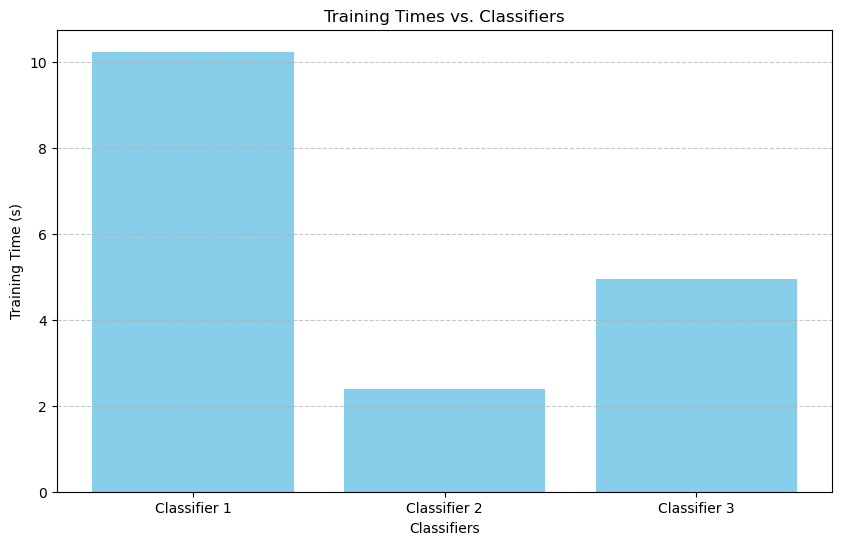

In [19]:
# Classifier names
classifiers = ["Classifier 1", "Classifier 2", "Classifier 3"]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(classifiers, training_time, color='skyblue')
plt.xlabel('Classifiers')
plt.ylabel('Training Time (s)')
plt.title('Training Times vs. Classifiers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Part IV: Neural Network Classifier
1. Design a simple neural network for digit classification. The network should have an input layer 
that matches the number of PCA components, at least one hidden layer, and an output layer 
with 10 units (corresponding to the 10-digit classes).
2. Use a softmax activation function in the output layer and a suitable loss function for 
classification.
3. Train the neural network on the PCA-reduced training data and validate its performance using 
the PCA-reduced test data.
4. Experiment with different hyperparameters for the neural network, such as the number of 
 hidden layers, the number of neurons in each layer, the learning rate, activation function, and 
the type of optimizer. How do these changes affect the model's performance on both the 
original and reduced datasets?

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Declared a list to store the execution times of NN models on different training sets 
NN_trainingtime = []


def create_model(num_pca_components):
    # Create a sequential model
    model = Sequential()

    # Input layer matching the number of PCA components
    model.add(Dense(64, input_dim=num_pca_components, activation='relu'))

    # Add at least one hidden layer
    model.add(Dense(64, activation='relu'))

    # Output layer with 10 units (corresponding to 10-digit classes)
    model.add(Dense(10, activation='softmax'))

    return model



def visualize_training_history(history):
    plt.subplot(211)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.grid(True)

    plt.subplot(212)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.grid(True)

    plt.tight_layout()
    plt.show()



In [21]:
# Define the number of PCA components
num_pca_components = X_train_pca1.shape[1] 

model1 = create_model(num_pca_components)

# Printing the summary of the model
model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                3264      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 8,074
Trainable params: 8,074
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Compile the model
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [23]:
# Train the model on PCA transformed traning data with n_components = 327 which retain 95 percent variance in data

# Start time
start_time1 = time.time()
history1 = model1.fit(X_train_pca1, y_train, epochs=10, batch_size=32, validation_data=(X_test_pca1, y_test))
# End time
end_time1 = time.time()

training_t1 = end_time1 -start_time1

NN_trainingtime.append(training_t1)

print("Training time for the Neural network model1 on the PCA-trasformed training data with n_components= 327 is",training_t1)

Epoch 1/10
1750/1750 [==============================] - 8s 4ms/step - loss: 0.3510 - accuracy: 0.8973 - val_loss: 0.1962 - val_accuracy: 0.9420
Epoch 2/10
1750/1750 [==============================] - 6s 3ms/step - loss: 0.1583 - accuracy: 0.9530 - val_loss: 0.1516 - val_accuracy: 0.9549
Epoch 3/10
1750/1750 [==============================] - 6s 3ms/step - loss: 0.1255 - accuracy: 0.9618 - val_loss: 0.1410 - val_accuracy: 0.9575
Epoch 4/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.1052 - accuracy: 0.9676 - val_loss: 0.1214 - val_accuracy: 0.9633
Epoch 5/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.0959 - accuracy: 0.9711 - val_loss: 0.1343 - val_accuracy: 0.9618
Epoch 6/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.0835 - accuracy: 0.9730 - val_loss: 0.1222 - val_accuracy: 0.9651
Epoch 7/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.0777 - accuracy: 0.9756 - val_loss: 0.1301 - val_accuracy:

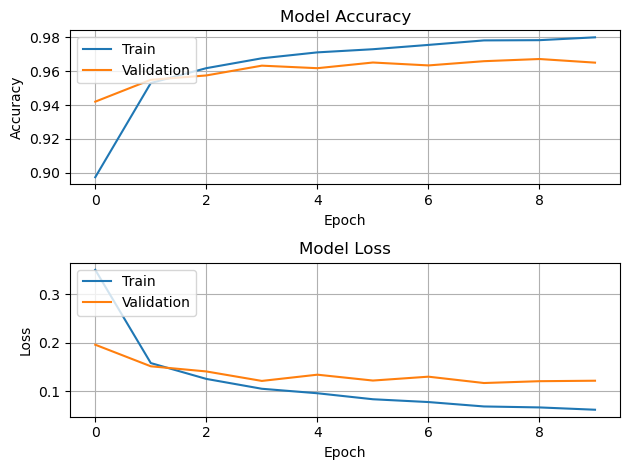

In [24]:
# Training history
visualize_training_history(history1)


In [25]:
# Evaluate the model on the test set
test_loss, test_accuracy = model1.evaluate(X_test_pca1, y_test)
print("Test Accuracy of model1 on PCA transfomed data with n_comp = 327 is :", test_accuracy*100)


438/438 [==============================] - 1s 2ms/step - loss: 0.1218 - accuracy: 0.9651
Test Accuracy of model1 on PCA transfomed data with n_comp = 327 is : 96.5071439743042


In [26]:
# Predict probabilities for test set
y_pred_prob = model1.predict(X_test_pca1)

# Convert probabilities to class predictions
y_pred = np.argmax(y_pred_prob, axis=1)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_mat)

438/438 [==============================] - 1s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1343
           1       0.99      0.99      0.99      1600
           2       0.94      0.97      0.96      1380
           3       0.98      0.93      0.95      1433
           4       0.97      0.97      0.97      1295
           5       0.94      0.97      0.96      1273
           6       0.98      0.99      0.98      1396
           7       0.96      0.97      0.96      1503
           8       0.95      0.95      0.95      1357
           9       0.96      0.94      0.95      1420

    accuracy                           0.97     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.97      0.97      0.97     14000

Confusion Matrix:
[[1307    2    5    0    1    4   12    2    7    3]
 [   0 1581    5    1    0    0    1    8    3    1]
 [   1    2 1337    4    6    3    4   

In [27]:
# Define the number of PCA components

num_pca_components = X_train.shape[1] 

# Create model

model2 = create_model(num_pca_components)

# Printing the summary of the model
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Compile the model
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [29]:
# Train the model on original training data 

# Start time
start_time2 = time.time()
history2 = model2.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
# End time
end_time2 = time.time()
 
training_t2 = end_time2 -start_time2

NN_trainingtime.append(training_t2)

print("Training time for the Neural network model2 on original training data is",training_t2)

Epoch 1/10
1750/1750 [==============================] - 7s 3ms/step - loss: 0.2576 - accuracy: 0.9237 - val_loss: 0.1512 - val_accuracy: 0.9572
Epoch 2/10
1750/1750 [==============================] - 6s 3ms/step - loss: 0.1122 - accuracy: 0.9656 - val_loss: 0.1448 - val_accuracy: 0.9586
Epoch 3/10
1750/1750 [==============================] - 6s 4ms/step - loss: 0.0797 - accuracy: 0.9752 - val_loss: 0.1372 - val_accuracy: 0.9644
Epoch 4/10
1750/1750 [==============================] - 7s 4ms/step - loss: 0.0585 - accuracy: 0.9814 - val_loss: 0.1487 - val_accuracy: 0.9638
Epoch 5/10
1750/1750 [==============================] - 7s 4ms/step - loss: 0.0466 - accuracy: 0.9843 - val_loss: 0.1490 - val_accuracy: 0.9660
Epoch 6/10
1750/1750 [==============================] - 6s 3ms/step - loss: 0.0379 - accuracy: 0.9875 - val_loss: 0.1726 - val_accuracy: 0.9629
Epoch 7/10
1750/1750 [==============================] - 6s 3ms/step - loss: 0.0338 - accuracy: 0.9892 - val_loss: 0.1670 - val_accuracy:

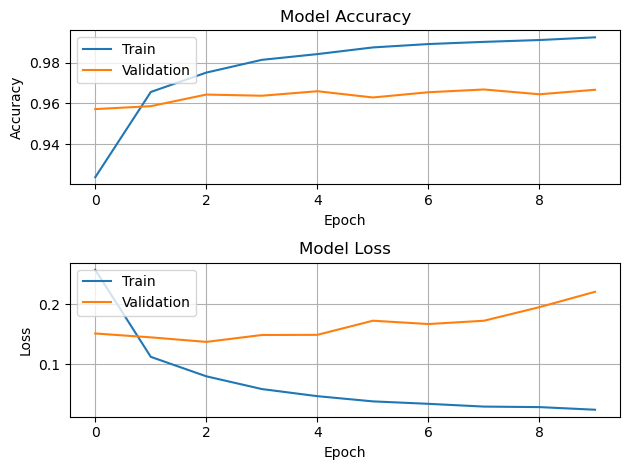

In [30]:
# Training history 
visualize_training_history(history2)

In [47]:
# Evaluate the model on the test set
test_loss, test_accuracy = model2.evaluate(X_test, y_test)
print("Test Accuracy of model2 on the Original data is :", test_accuracy*100)


438/438 [==============================] - 1s 3ms/step - loss: 0.2209 - accuracy: 0.9667
Test Accuracy of model2 on the Original data is : 96.67142629623413


In [32]:
# Predict probabilities for test set
y_pred_prob = model2.predict(X_test)

# Convert probabilities to class predictions
y_pred = np.argmax(y_pred_prob, axis=1)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_mat)

438/438 [==============================] - 1s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1343
           1       0.97      0.99      0.98      1600
           2       0.95      0.97      0.96      1380
           3       0.97      0.95      0.96      1433
           4       0.96      0.98      0.97      1295
           5       0.96      0.96      0.96      1273
           6       0.98      0.98      0.98      1396
           7       0.96      0.97      0.96      1503
           8       0.96      0.94      0.95      1357
           9       0.97      0.95      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000

Confusion Matrix:
[[1317    0    4    0    1    1    7    6    6    1]
 [   1 1589    4    2    1    0    1    2    0    0]
 [   0    9 1334    2    5    2    2   

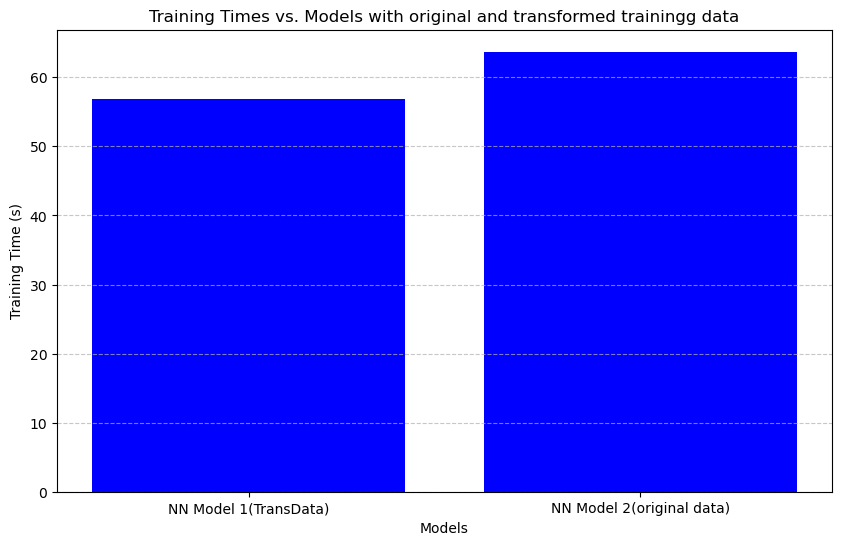

In [33]:
# Classifier names
classifiers = ["NN Model 1(TransData)", "NN Model 2(original data)"]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(classifiers, NN_trainingtime, color='blue')
plt.xlabel('Models')
plt.ylabel('Training Time (s)')
plt.title('Training Times vs. Models with original and transformed trainingg data')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers

def create_mnist_model(input_shape, dropout_rate=0.2):
    model = Sequential([
        Dense(128, input_shape=input_shape, activation='relu'),
        Dropout(dropout_rate),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        Dense(10, activation='softmax')
    ])
    
    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model



In [35]:
NN_train_time =[]

# Define the input size

input_shape = (784,)
mnist_model1 = create_mnist_model(input_shape)
mnist_model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [36]:

# Start time
st1 = time.time()
mnist_history1 =  mnist_model1.fit(X_train, y_train, epochs=20, batch_size=256, validation_data=(X_test, y_test))
# End time
end1 = time.time()
t1 = end1 -st1

NN_train_time.append(t1)

Epoch 1/20
219/219 [==============================] - 3s 10ms/step - loss: 0.5211 - accuracy: 0.8441 - val_loss: 0.2131 - val_accuracy: 0.9365
Epoch 2/20
219/219 [==============================] - 2s 7ms/step - loss: 0.2445 - accuracy: 0.9274 - val_loss: 0.1670 - val_accuracy: 0.9513
Epoch 3/20
219/219 [==============================] - 2s 8ms/step - loss: 0.1896 - accuracy: 0.9434 - val_loss: 0.1494 - val_accuracy: 0.9565
Epoch 4/20
219/219 [==============================] - 2s 9ms/step - loss: 0.1597 - accuracy: 0.9513 - val_loss: 0.1398 - val_accuracy: 0.9614
Epoch 5/20
219/219 [==============================] - 2s 9ms/step - loss: 0.1392 - accuracy: 0.9577 - val_loss: 0.1313 - val_accuracy: 0.9631
Epoch 6/20
219/219 [==============================] - 2s 9ms/step - loss: 0.1215 - accuracy: 0.9623 - val_loss: 0.1310 - val_accuracy: 0.9661
Epoch 7/20
219/219 [==============================] - 2s 9ms/step - loss: 0.1144 - accuracy: 0.9647 - val_loss: 0.1270 - val_accuracy: 0.9672
Epoch

In [49]:
print("Training time for the Neural network model2 on original training data is",t1)

Training time for the Neural network model2 on original training data is 36.086716175079346


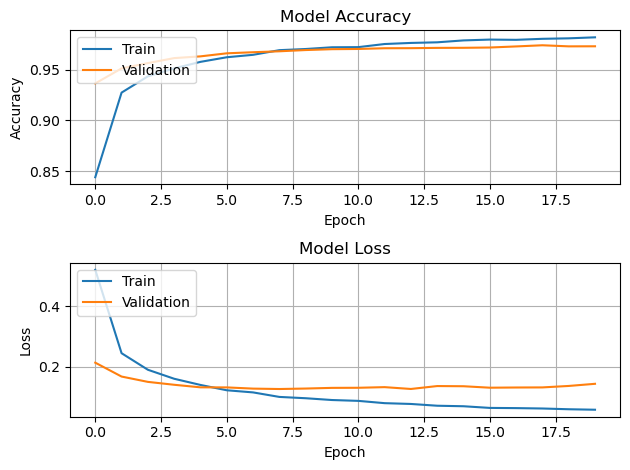

In [37]:
# Training history
visualize_training_history(mnist_history1)


In [38]:
# Evaluate the model on the test set
test_loss, test_accuracy = mnist_model1.evaluate(X_test, y_test)
print("Test Accuracy of model on original data is :", test_accuracy*100)


438/438 [==============================] - 2s 4ms/step - loss: 0.1430 - accuracy: 0.9731
Test Accuracy of model on original data is : 97.30714559555054


In [39]:
# Predict probabilities for test set
y_pred_prob = mnist_model1.predict(X_test)

# Convert probabilities to class predictions
y_pred = np.argmax(y_pred_prob, axis=1)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_mat)

438/438 [==============================] - 2s 3ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1343
           1       0.99      0.99      0.99      1600
           2       0.97      0.97      0.97      1380
           3       0.97      0.97      0.97      1433
           4       0.98      0.97      0.97      1295
           5       0.98      0.97      0.98      1273
           6       0.97      0.99      0.98      1396
           7       0.96      0.98      0.97      1503
           8       0.97      0.96      0.96      1357
           9       0.96      0.96      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000

Confusion Matrix:
[[1316    0    5    0    1    1   10    3    6    1]
 [   0 1581    5    2    1    1    2    5    1    2]
 [   2    5 1340    3    4    2    7   

In [40]:
# Define the input size
input_shape = (327,)

# Define and compile the model
mnist_model2 = create_mnist_model(input_shape)

#Print the summary of model
mnist_model2.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               41984     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [41]:

# Start time
st2 = time.time()
mnist_history2 =  mnist_model2.fit(X_train_pca2, y_train, epochs=20, batch_size= 256, validation_data=(X_test_pca2, y_test))
# End time
end2 = time.time()
t2 = end2 -st2

NN_train_time.append(t2)

Epoch 1/20
219/219 [==============================] - 3s 8ms/step - loss: 0.8036 - accuracy: 0.7635 - val_loss: 0.2774 - val_accuracy: 0.9206
Epoch 2/20
219/219 [==============================] - 1s 7ms/step - loss: 0.3245 - accuracy: 0.9065 - val_loss: 0.2157 - val_accuracy: 0.9402
Epoch 3/20
219/219 [==============================] - 2s 7ms/step - loss: 0.2502 - accuracy: 0.9257 - val_loss: 0.1864 - val_accuracy: 0.9481
Epoch 4/20
219/219 [==============================] - 2s 7ms/step - loss: 0.2065 - accuracy: 0.9385 - val_loss: 0.1683 - val_accuracy: 0.9536
Epoch 5/20
219/219 [==============================] - 1s 6ms/step - loss: 0.1848 - accuracy: 0.9452 - val_loss: 0.1557 - val_accuracy: 0.9568
Epoch 6/20
219/219 [==============================] - 2s 7ms/step - loss: 0.1596 - accuracy: 0.9511 - val_loss: 0.1488 - val_accuracy: 0.9598
Epoch 7/20
219/219 [==============================] - 2s 7ms/step - loss: 0.1432 - accuracy: 0.9557 - val_loss: 0.1458 - val_accuracy: 0.9616
Epoch 

In [48]:
print("Training time for the Neural network Reduced training data is",t2)

Training time for the Neural network Reduced training data is 32.055481910705566


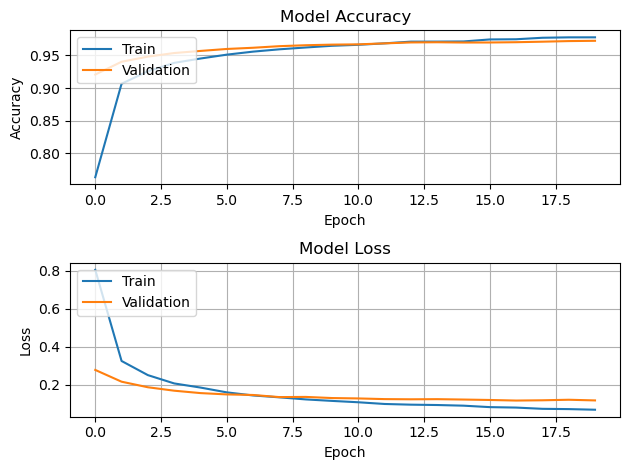

In [42]:
# Training history
visualize_training_history(mnist_history2)

In [43]:
# Evaluate the model on the test set
test_loss, test_accuracy = mnist_model2.evaluate(X_test_pca2, y_test)
print("Test Accuracy of model on PCA transfomed data with n_comp = 327 is :", test_accuracy*100)


438/438 [==============================] - 1s 3ms/step - loss: 0.1172 - accuracy: 0.9723
Test Accuracy of model on PCA transfomed data with n_comp = 327 is : 97.22856879234314


In [44]:
# Predict probabilities for test set
y_pred_prob = mnist_model2.predict(X_test_pca2)

# Convert probabilities to class predictions
y_pred = np.argmax(y_pred_prob, axis=1)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_mat)

438/438 [==============================] - 1s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1343
           1       0.98      0.99      0.99      1600
           2       0.97      0.97      0.97      1380
           3       0.97      0.96      0.97      1433
           4       0.97      0.97      0.97      1295
           5       0.97      0.97      0.97      1273
           6       0.98      0.99      0.98      1396
           7       0.96      0.97      0.97      1503
           8       0.96      0.96      0.96      1357
           9       0.96      0.96      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000

Confusion Matrix:
[[1322    0    3    0    1    1    8    2    4    2]
 [   1 1580    4    1    0    0    0    8    5    1]
 [   3    7 1332    5    5    2    6   

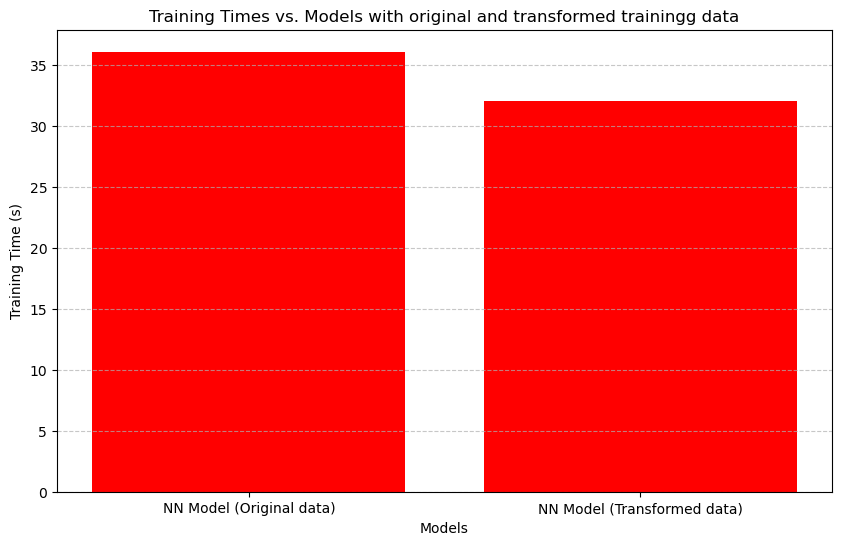

In [45]:
# Classifier names
classifiers = ["NN Model (Original data)", "NN Model (Transformed data)"]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(classifiers, NN_train_time, color='Red')
plt.xlabel('Models')
plt.ylabel('Training Time (s)')
plt.title('Training Times vs. Models with original and transformed trainingg data')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

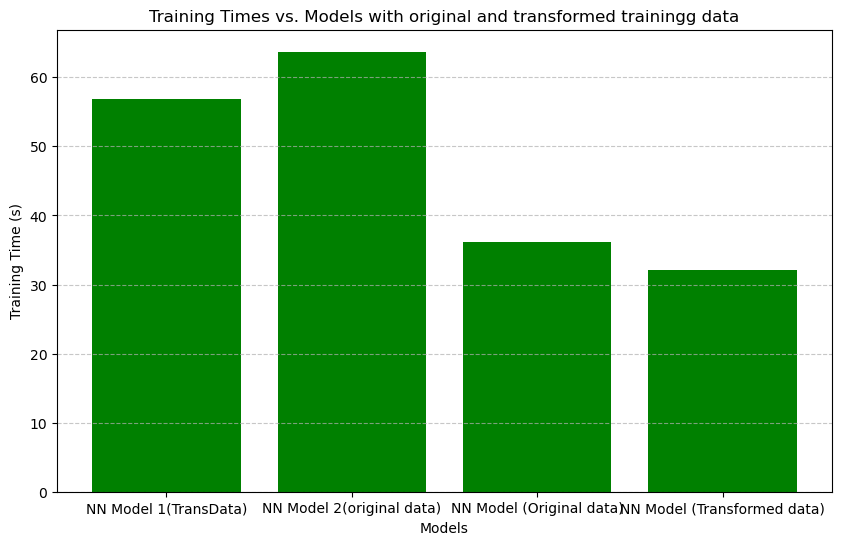

In [46]:
# Classifier names
classifiers = ["NN Model 1(TransData)", "NN Model 2(original data)","NN Model (Original data)", "NN Model (Transformed data)"]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(classifiers,NN_trainingtime+ NN_train_time, color='green')
plt.xlabel('Models')
plt.ylabel('Training Time (s)')
plt.title('Training Times vs. Models with original and transformed trainingg data')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Part V: Performance Evaluation
1. Evaluate the trained neural network on the test set and report metrics such as accuracy and
precision.
2. Compare the performance of the neural network classifier on the PCA-reduced data to the
performance of the Logistic Regression classifier.
3. Discuss the impact of dimensionality reduction on the classifier's performance, training time, 
and model complexity.

#Performance of the neural network classifier on the PCA-reduced data to the performance of the Logistic Regression classifier.

We can see that the performace of the Neural network is better compared to the logistic regression model on the PCA reduced data as the accuracy of the neural network model is nearly 97.5 percent whereas the logistic regression model is only 92 and also we can observe that the number of iterations exceeded for the logostic regression model defined using the inbuilt library which means it couldn't perform well on the large datasets like MNIST and the logistic regression performs well mostly on smaller datasets but the time taken by the logistic model on PCA reduced model is less compared Neural networks i.e due to the limitation of iterations for it and for Neural networks we can decide the number of epochs.

So, we can conclude that the logistic regression model performs better on the smaller datasets and for the larger datasets we can perfer the Neural networks 


# Discuss the impact of dimensionality reduction on the classifier's performance, training time, and model complexity.

Dimensionality reduction techniques like PCA can have significant impacts on the performance, training time, and model complexity of classifiers. 

Pros:

Improved Performance: This sometimes enhance classifier performance by removing irrelevant or redundant features, leading to a more discriminative representation of the data.

By lowering the quantity of features that must be processed, dimensionality reduction can lessen the computational load during training. 

Models become simpler and easier to understand when input data is reduced in dimension. The performance of generalisation can be enhanced and overfitting can be lessened by this reduction in model complexity.

Cons 

Nevertheless, dimensionality reduction may also lead to information loss, especially if there aren't enough dimensions left to fully capture the variability in the data. The performance of the classifier may suffer as a result.

Risk of Underfitting: However, if the reduced dimensionality is not sufficient to capture the underlying structure of the data, classifiers may struggle to learn complex patterns, leading to underfitting.


